In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def subplot_align(axis1, *axes, dim='x'):
    """
    Aligns the position of the given primary axis (axis1) with other specified axes based on the specified dimension.

    This function adjusts the position of the primary axis `axis1` to align with the other given axes along the specified dimension ('x', 'y', or 'both'). It listens for resize events on the figure canvas and dynamically adjusts the position of `axis1` to maintain alignment.

    Parameters:
    axis1 (matplotlib.axes.Axes): The primary axis whose position will be adjusted.
    *axes (matplotlib.axes.Axes): Additional axes to which the primary axis should be aligned.
    dim (str): The dimension along which to align the axes. Must be one of 'x', 'y', or 'both'. Default is 'x'.

    Raises:
    ArgumentError: If the specified dimension is not 'x', 'y', or 'both'.

    Returns:
    None

    Example:
    --------
    >>> fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    >>> subplot_align(ax1, ax2, ax3, dim='y')
    
    This will align `ax1` with `ax2` and `ax3` along the y-axis.
    """
    
    # Check if the specified dimension is valid
    if not dim.lower() in ['x', 'y', 'both']:
        raise ArgumentError(f'dimension to align is not understood. You chose: {dim}. Please specify either "x" or "y" or "both".')
    
    def onresize(axis1, axes, event):
        """
        Inner function to handle the resize event by adjusting the position of axis1.
        """
        if dim.lower() == 'x':
            # Concatenate all x-axis positions of the specified axes
            x = np.concatenate([[ax.get_position().x0, ax.get_position().x1] for ax in axes])
            # Calculate the new width and x-position for axis1
            width = max(x) - min(x)
            x = min(x)
            y = axis1.get_position().y0
            height = axis1.get_position().height
        elif dim.lower() == 'y':
            # Concatenate all y-axis positions of the specified axes
            y = np.concatenate([[ax.get_position().y0, ax.get_position().y1] for ax in axes])
            # Calculate the new height and y-position for axis1
            height = max(y) - min(y)
            y = min(y)
            x = axis1.get_position().x0
            width = axis1.get_position().width
        elif dim.lower() == 'both':
            # Concatenate all x and y positions of the specified axes
            x = np.concatenate([[ax.get_position().x0, ax.get_position().x1] for ax in axes])
            width = max(x) - min(x)
            x = min(x)
            y = np.concatenate([[ax.get_position().y0, ax.get_position().y1] for ax in axes])
            height = max(y) - min(y)
            y = min(y)
        # Set the new position of axis1
        return axis1.set_position([x, y, width, height])
    
    import functools
    # Create a partial function that binds the axes and the onresize function
    onresize_wrapper = functools.partial(onresize, axis1, axes)
    # Connect the resize event of the figure to the onresize_wrapper function
    cid = axis1.figure.canvas.mpl_connect('resize_event', onresize_wrapper)
    
    # Initially align the axis1 with the specified axes
    return onresize(axis1, axes, None)

In [3]:
joined_lfes_fp = '../data/calculated/Joined_LFEs_w_phases.csv'

In [4]:
# Import lfe data and clear nans
lfes = pd.read_csv(joined_lfes_fp, usecols=['start', 'end', 'duration', 'subLST', 'subLat', 'R_ksm', 'x_ksm', 'y_ksm', 'z_ksm', 'north phase', 'south phase'])
lfes = lfes.dropna().reset_index(drop=True)

# Sort data in north/south bins
phase_bins = np.arange(0, 390, 30)
lfes['north_bins'] = pd.cut(lfes['north phase'] % 360, bins=phase_bins)
lfes['south_bins'] = pd.cut(lfes['south phase'] % 360, bins=phase_bins)
lfes

,start,end,x_ksm,y_ksm,z_ksm,R_ksm,subLST,subLat,duration,south phase,north phase,north_bins,south_bins
0,2004-01-01 14:30:00.000,2004-01-01 16:03:00.000,661.934428,-1278.464845,-133.754364,1445.862987,7.524167,-19.815590,5580.0,1.278155e+03,-1.505370e+03,"(270, 300]","(180, 210]"
1,2004-01-02 05:06:00.000,2004-01-02 10:42:00.000,659.308606,-1274.576701,-133.997206,1441.245592,7.522500,-19.815244,20160.0,1.765552e+03,-1.007936e+03,"(60, 90]","(300, 330]"
2,2004-01-02 21:42:00.000,2004-01-03 03:03:00.000,656.327085,-1270.250611,-133.347868,1435.995651,7.520556,-19.814847,19260.0,2.319715e+03,-4.423594e+02,"(270, 300]","(150, 180]"
3,2004-01-03 23:39:00.000,2004-01-04 01:18:00.000,651.675000,-1263.356873,-133.526119,1427.788541,7.517778,-19.814223,5940.0,3.186013e+03,4.417794e+02,"(60, 90]","(300, 330]"
4,2004-01-04 01:39:00.000,2004-01-04 08:09:00.000,651.316907,-1262.845872,-133.344779,1427.155997,7.517500,-19.814175,23400.0,3.252780e+03,5.099212e+02,"(120, 150]","(0, 30]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4436,2017-09-10 23:36:00.000,2017-09-11 01:24:00.000,-16.642867,4.309377,8.199832,19.047126,23.128333,-0.544714,6480.0,4.038835e+06,4.030982e+06,"(60, 90]","(330, 360]"
4437,2017-09-11 02:27:00.000,2017-09-11 04:06:00.000,-16.892457,4.256448,8.629980,19.440910,23.157222,0.453786,5940.0,4.038835e+06,4.031077e+06,"(150, 180]","(330, 360]"
4438,2017-09-11 04:24:00.000,2017-09-11 10:24:00.000,-17.038932,4.212010,8.912990,19.685213,23.176111,1.114904,21600.0,4.038835e+06,4.031143e+06,"(210, 240]","(330, 360]"
4439,2017-09-11 10:36:00.000,2017-09-11 15:03:00.000,-17.380144,4.047623,9.743447,20.331931,23.233889,3.120457,16020.0,4.038835e+06,4.031350e+06,"(60, 90]","(330, 360]"


In [5]:
def select_lfes(lfes, subLST_cond=(lfes['subLST'].min(), lfes['subLST'].max()), duration_cond=(lfes['duration'].min(), lfes['duration'].max()), subLat_cond=(lfes['subLat'].min(), lfes['subLat'].max())):
    """placeholder"""
    subLST_min, subLST_max = subLST_cond
    duration_min, duration_max = duration_cond
    subLat_min, subLat_max = subLat_cond

    selected_lfes = lfes[(subLST_min <= lfes['subLST']) & (lfes['subLST'] <= subLST_max) & (duration_min <= lfes['duration']) & (lfes['duration'] <= duration_max) & (subLat_min <= lfes['subLat']) & (lfes['subLat'] <= subLat_max)]
    return selected_lfes

# Select here which LFEs you want to plot
Note: You have to provide both lower and upper bound limits if you want to use a condition.

In [6]:
selected_lfes = select_lfes(lfes) # All LFEs

#selected_lfes = select_lfes(lfes, subLST_cond=(3, 9)) # LFEs at dawn
#selected_lfes = select_lfes(lfes, subLST_cond=(15, 21)) # LFEs at dusk

#selected_lfes = select_lfes(lfes, duration_cond=(lfes['duration'].min(), 11*3600)) # Short duration LFEs
#selected_lfes = select_lfes(lfes, duration_cond=(11*3600, lfes['duration'].max())) # Long duration LFEs

#selected_lfes = select_lfes(lfes, subLat_cond=(lfes['subLat'].min(), -11)) # LFEs seen from southern latitude
#selected_lfes = select_lfes(lfes, subLat_cond=(11, lfes['subLat'].max())) # LFEs seen from northern latitude

#selected_lfes = select_lfes(lfes, subLST_cond=(15, 21), subLat_cond=(lfes['subLat'].min(), -11)) # LFEs at dawn in the southern latitudes

In [7]:
# Find the amount of lfe counts by phase in 2d north/south bins, and 1D south / 1D north bins
phase_counts = selected_lfes.groupby(['north_bins', 'south_bins']).size()
n_counts = selected_lfes.groupby('north_bins').size().to_numpy()
s_counts = selected_lfes.groupby('south_bins').size().to_numpy()

# Create the lfe count map by phase ready to be plotted
phase_map = phase_counts.to_numpy().reshape((len(phase_bins)-1,len(phase_bins)-1))

/var/folders/j9/q8hqts053r57j7y11x4bv2_c0000gn/T/ipykernel_60626/2302286000.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  phase_counts = selected_lfes.groupby(['north_bins', 'south_bins']).size()
/var/folders/j9/q8hqts053r57j7y11x4bv2_c0000gn/T/ipykernel_60626/2302286000.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_counts = selected_lfes.groupby('north_bins').size().to_numpy()
/var/folders/j9/q8hqts053r57j7y11x4bv2_c0000gn/T/ipykernel_60626/2302286000.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False t

In [8]:
# North South Distribution Plot
big_map = np.tile(phase_map, (3,3)) #  Have to create this otherwise the lines do not start at the edges
big_centers = np.arange(-360, 720, 30) + 15  # Centers for the map above
centers = phase_bins[:-1] + 15  # Centers for the regular colormap

# Levels Number
if phase_map.max() < 10:
    levels = phase_map.max()
else:
    levels = 10

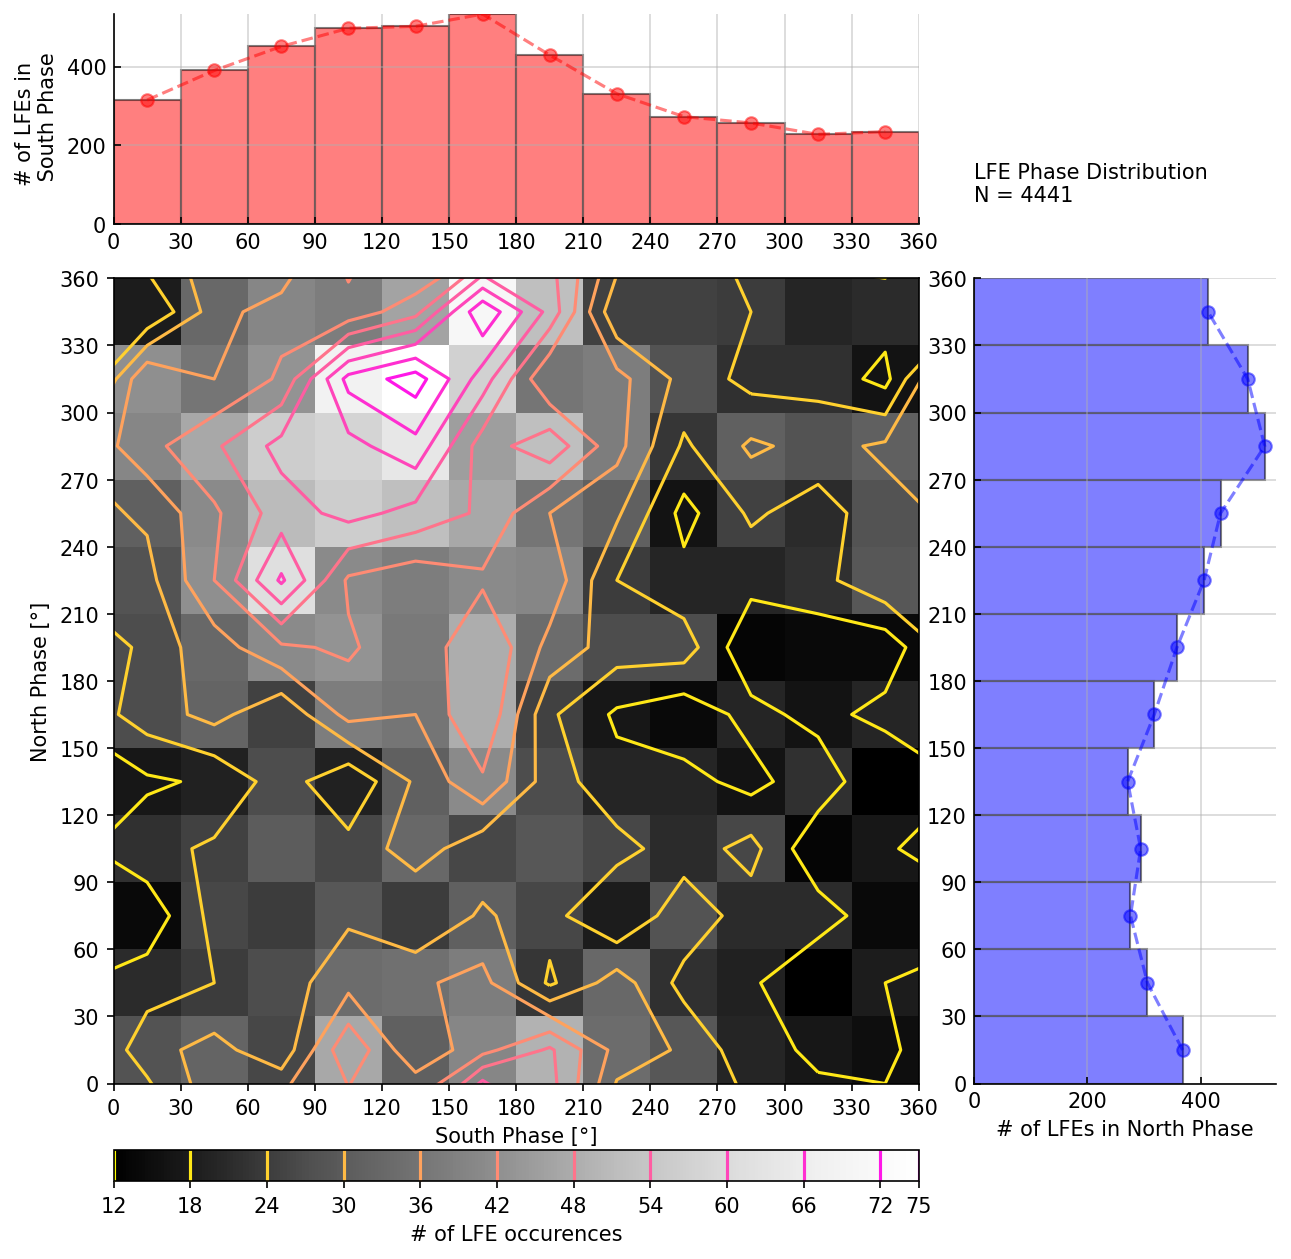

In [9]:
# Limits of histograms
xlim1, xlim2 = 0, 360
ylim1, ylim2 = 0, np.max(np.hstack((n_counts, s_counts)))

# Figure
fig = plt.figure(figsize=(10,10), dpi=150)
gs = fig.add_gridspec(3, 2, height_ratios=[1, 4, 0.15], width_ratios=[2, 0.75], wspace=0.1, hspace=0.1)

# Title
axt = fig.add_subplot(gs[1])
axt.axis('off')
axt.annotate(f"LFE Phase Distribution \n"
            f"N = {phase_map.sum()} \n", (0,0))

# LFE Phase Distribution
ax = fig.add_subplot(gs[2])

distr = ax.pcolormesh(phase_bins, phase_bins, phase_map, cmap='Greys_r')  # Colormap
ctr = ax.contour(big_centers, big_centers, big_map, levels=levels, cmap='spring_r')  # Contour plot
ax.set_aspect('equal')

ax.set_xlim(xlim1, xlim2)
ax.set_ylim(xlim1, xlim2)
ax.set_xticks(phase_bins)
ax.set_yticks(phase_bins)
ax.set_yticklabels(phase_bins)
ax.set_xlabel('South Phase [°]')
ax.set_ylabel('North Phase [°]')

# Colour Bar
ax_cbar = fig.add_subplot(gs[4])
cbar = fig.colorbar(distr, cax=ax_cbar, label='# of LFE occurences', orientation='horizontal', ticks=np.hstack((ctr.levels, phase_map.max())))
cbar.add_lines(ctr)
pos = ax_cbar.get_position()
ax_cbar.set_position([pos.x0, pos.y0-.008, pos.width, pos.height])

# South Phase Distribution
axs = fig.add_subplot(gs[0])
axs.bar(centers, s_counts, width=30, edgecolor='black', align='center', facecolor='red', alpha=0.5, label='# LFEs in South Phase')
axs.plot(centers, s_counts, 'o--', color='red', alpha=0.5)

axs.set_xticks(phase_bins)
axs.tick_params(axis="x", direction="in")
axs.tick_params(axis="y", direction="in")
axs.spines[['right', 'top']].set_visible(False)
axs.set_ylim(ylim1, ylim2)
axs.set_xlim(xlim1, xlim2)
axs.set_ylabel('# of LFEs in \n South Phase')
axs.grid(alpha=0.5)

# North Phase Distribution
axn = fig.add_subplot(gs[3])
axn.barh(centers, n_counts, height=30, edgecolor='black', align='center', facecolor='blue', alpha=0.5, label='#LFEs in North Phase')
axn.plot(n_counts, centers, 'o--', color='blue', alpha=0.5)

axn.set_yticks(phase_bins)
axn.tick_params(axis="x", direction="in")
axn.tick_params(axis="y", direction="in")
axn.spines[['right', 'top']].set_visible(False)
axn.set_ylim(xlim1, xlim2)
axn.set_xlim(ylim1, ylim2)
axn.set_xlabel('# of LFEs in North Phase')
axn.grid(alpha=0.5)

# Adjust Positon
axs.sharex(ax)
axn.sharey(ax)

subplot_align(ax_cbar, ax, dim='x')
subplot_align(axn, ax, dim='y')
subplot_align(axs, ax, dim='x')
#plt.tight_layout();